In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, TreeSearch, K2Score, BicScore, BDeuScore, BayesianEstimator, MaximumLikelihoodEstimator

In [99]:
train = pd.read_csv('data/hourly/hourly_data.csv')
stations = train.iloc[:, 4:]
stations = stations.fillna(0).astype(int)

## Structure Learning

In [101]:
est = HillClimbSearch(stations)
best_model = est.estimate(scoring_method = K2Score(stations))

  0%|          | 28/1000000 [00:02<25:37:22, 10.84it/s]


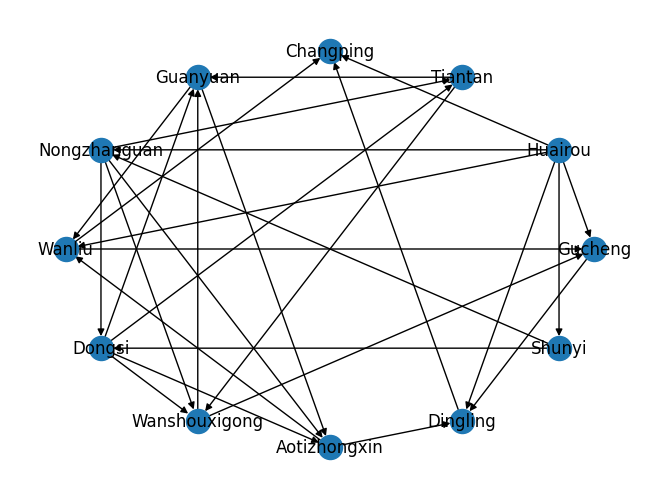

In [102]:
import networkx as nx
nx.draw_circular(best_model, with_labels = True)

## Estimate Parameters

In [103]:
model = BayesianNetwork(best_model.edges())

In [104]:
model.fit(stations, estimator=BayesianEstimator, prior_type = 'K2')

In [105]:
model.check_model()

True

In [111]:
# Testing Y
test = pd.read_csv('data/hourly/hourly_data.csv').fillna(0)
test = test.astype(int)
Dingling = test['Gucheng']

In [112]:
features_test = test.drop('Gucheng', axis = 1).iloc[:, 4:].astype(int)

In [113]:
pred = model.predict(stations.iloc[:, 1:])
acc = (Dingling.values == pred.values).mean()

100%|██████████| 12677/12677 [00:23<00:00, 536.62it/s]


In [114]:
acc

0.22813215958834168

In [115]:
pred

,Gucheng
0,0
1,0
2,0
3,0
4,0
...,...
35059,0
35060,1
35061,1
35062,0


In [117]:
Dingling

0        0
1        0
2        0
3        0
4        0
        ..
35059    1
35060    1
35061    1
35062    0
35063    0
Name: Gucheng, Length: 35064, dtype: int64